/tmp/ipykernel_1782/2892795254.py:23: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


           type  type_encoded
0  conventional             0
1  conventional             0
2  conventional             0
3  conventional             0
4  conventional             0
5  conventional             0
6  conventional             0
7  conventional             0
8  conventional             0
9  conventional             0
   region  region_encoded
0  Albany             338
1  Albany             338
2  Albany             338
3  Albany             338
4  Albany             338
5  Albany             338
6  Albany             338
7  Albany             338
8  Albany             338
9  Albany             338
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      18249 non-null  int64         
 1   Date            18249 non-null  datetime64[ns]
 2   AveragePrice    18249 non-null  float64       
 3   Total Volu

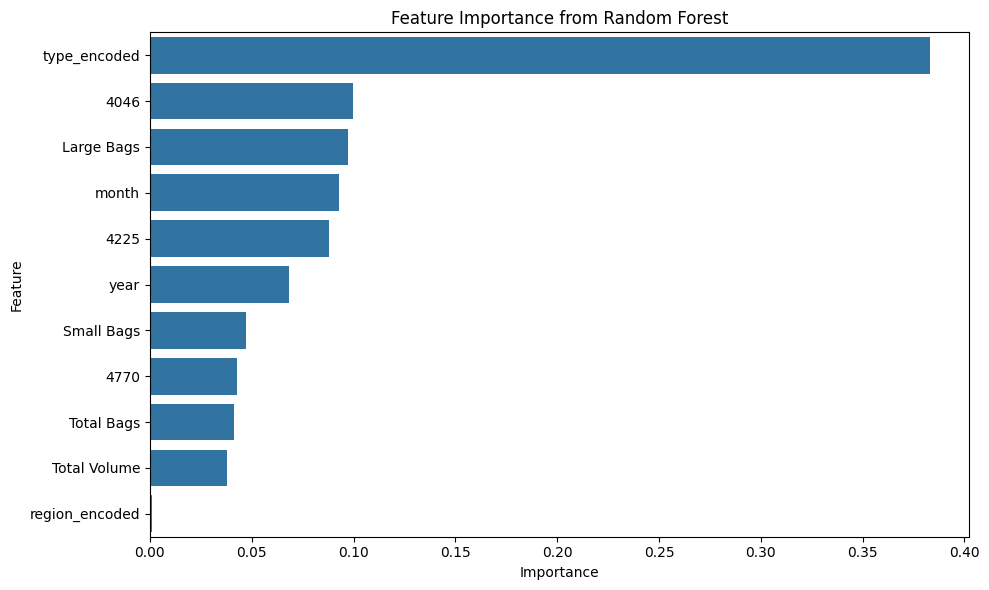

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("../dataset/avocado_retail_sales.csv")

# For preprocessing and modeling
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#import joblib 

#--------- DATA_CLEANING , PREPROCESSING--------Start

# Drop columns that are not useful for prediction
df.drop(columns=['S.No', 'XLarge Bags'], inplace=True, errors='ignore')

# Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract 'year' and 'month' as separate features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

#label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
print(df[['type', 'type_encoded']].head(10))

# Frequency encode 'region' (convert to numeric based on occurrence count)
region_freq = df['region'].value_counts().to_dict()
df['region_encoded'] = df['region'].map(region_freq)
print(df[['region', 'region_encoded']].head(10))

df.info()

#------------ DATA_CLEANING , PREPROCESSING--------End


# Feature eingineering                                                                     
y= df['AveragePrice']                                                  #define targetvariable
x = df[['Total Volume', '4046', '4225', '4770',
        'Total Bags', 'Small Bags', 'Large Bags',
        'type_encoded', 'region_encoded', 'year', 'month']]             #define features
print("shape x:",x.shape)
print("shape y:",y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(                   # split the data
    x, y, test_size=0.2, random_state=42)
print(f"Training features: {X_train.shape}")                           # Check the shapes     
print(f"Testing features: {X_test.shape}")
print(f"Training target: {y_train.shape}")
print(f"Testing target: {y_test.shape}")
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()                                            #create, train model(model building) LR
l_model.fit(X_train,y_train)
from sklearn.ensemble import RandomForestRegressor                      
r_model = RandomForestRegressor(n_estimators=100, random_state=42)       #create, train model(model building) RF
r_model.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error        #model evaluation, comparision 
y_pred_l = l_model.predict(X_test)
y_pred_r = r_model.predict(X_test)
mae_l = mean_absolute_error(y_test,y_pred_l)
rmse_l = np.sqrt(mean_squared_error(y_test,y_pred_l))
mae_r = mean_absolute_error(y_test,y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test,y_pred_r))
print("LinearRegression_MAE:", mae_l)
print("LinearRegression_RMSE:", rmse_l)
print("RandomForestRegressor_MAE:", mae_r)
print("RandomForestRegressor_RMSE:", rmse_r)                        #model evaluation, comparision

# Assuming `r_model` is already trained and `x.columns` are feature names
importances = r_model.feature_importances_
feature_names = x.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


import joblib

# Save the model
joblib.dump(r_model, 'random_forest_model.pkl')

# Save the feature names
joblib.dump(list(x.columns), 'feature_names.pkl')


